/home/mpim/m300733/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/mpim/m300733/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
2019-07-19 11:14:56 MainProcess:INFO:root:Created Konrad object:
RCE(
    atmosphere=Atmosphere,
    radiation=RRTMG,
    ozone=OzonePressure,
    humidity=FixedRH,
    surface=SurfaceHeatCapacity,
    cloud=<konrad.cloud.ClearSky object at 0x7f6d92259dd8>,
    convection=HardAdjustment,
    lapserate=MoistLapseRate,
    upwelling=NoUpwelling,
    max_duration=6000.0,
    timestep=0.6666666666666666,
    writeevery=1.0,
    max_iterations=9000.0,
    

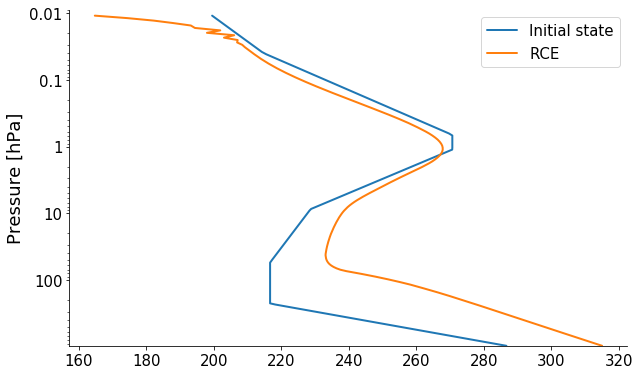

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from typhon import plots

import konrad

plev, phlev = konrad.utils.get_pressure_grids(1000e2, 1, 201)

atmosphere = konrad.atmosphere.Atmosphere(plev)

atmosphere.tracegases_rcemip()  # Atmosphere composition according to RCEMIP.

# Plot the initial temperature profile (for comparison).
plt.style.use(plots.styles('typhon'))
fig, ax = plt.subplots()
plots.profile_p_log(atmosphere['plev'], atmosphere['T'][-1, :], label='Initial state')

# Initialize the setup for the radiative-convective equilibrium simulation.
rce = konrad.RCE(
    atmosphere,
    radiation=konrad.radiation.RRTMG(),  # Use RRTMG radiation scheme.
    humidity=konrad.humidity.FixedRH(rh_func=konrad.)
    convection=konrad.convection.HardAdjustment(),  # Perform a hard convective adjustment.
    lapserate=konrad.lapserate.MoistLapseRate(),  # Adjust towards a moist adiabat.
    timestep='16h',  # Set timestep in model time.
    max_duration='6000d',  # Set maximum runtime.
)
rce.run()  # Start the simulation.

# Plot the equilibrium temperature profile.
plots.profile_p_log(atmosphere['plev'], atmosphere['T'][-1, :], label='RCE')
ax.legend()